# SVM for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data
%store -r data_test

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora'],
      dtype='object')
(11016, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   temp       

In [4]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora'],
      dtype='object')
(2256, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       1752 non-null   float64       
 6   city_name                1752 non-null   object        
 7   temp          

Drop columns that have low correlation with the label

In [5]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = True
if nulls:
    data_dt_test['temp']                = data_dt_test['temp'].fillna(0)
    data_dt_test['feels_like']          = data_dt_test['feels_like'].fillna(0)
    data_dt_test['temp_min']            = data_dt_test['temp_min'].fillna(0)
    data_dt_test['temp_max']            = data_dt_test['temp_max'].fillna(0)
    data_dt_test['humidity']            = data_dt_test['humidity'].fillna(0)
    data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].fillna(0)

data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   clouds_all               11016 non-null  int64  
 10  weather_description      11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [6]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


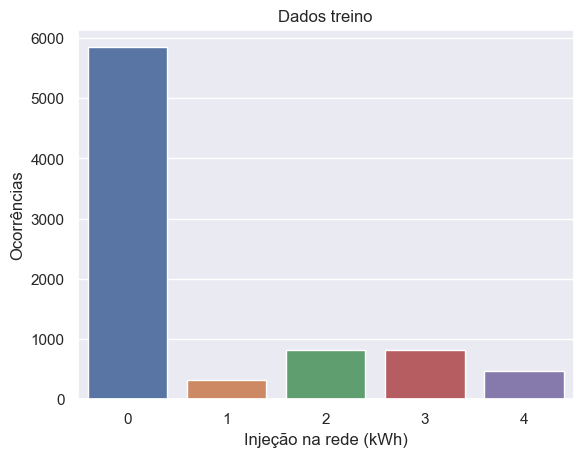

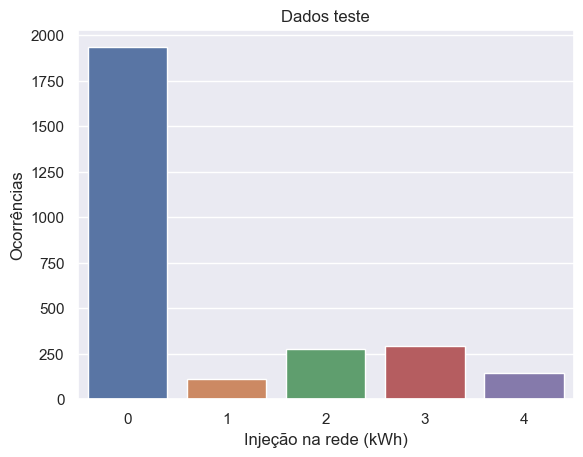

In [8]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

Let's make our model with 10 folds

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [10]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X,y,cv=10)
scores

/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A colu

array([0.72595281, 0.70326679, 0.71143376, 0.7168784 , 0.72504537,
       0.71869328, 0.67302452, 0.71843778, 0.71843778, 0.71934605])

In [12]:
print("%0.2f accuracy with a standard deviation of %0.2f" %(scores.mean(),scores.std()))

0.71 accuracy with a standard deviation of 0.01


And now without Cross Validation:

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC(random_state=2021)

In [15]:
model.fit(X_train,y_train)

/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=2021)

### Predictions and evaluations

Let's predict using the trained model:

In [57]:
predictions = model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, ConfusionMatrixDisplay, accuracy_score

In [59]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.72 accuracy


In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1933
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00       276
           3       0.39      0.21      0.28       292
           4       0.00      0.00      0.00       143

    accuracy                           0.72      2754
   macro avg       0.23      0.24      0.22      2754
weighted avg       0.56      0.72      0.62      2754



c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1911    0    0   22    0]
 [ 103    0    0    7    0]
 [ 246    0    0   30    0]
 [ 230    0    0   62    0]
 [ 106    0    0   37    0]]
0.7164124909222949


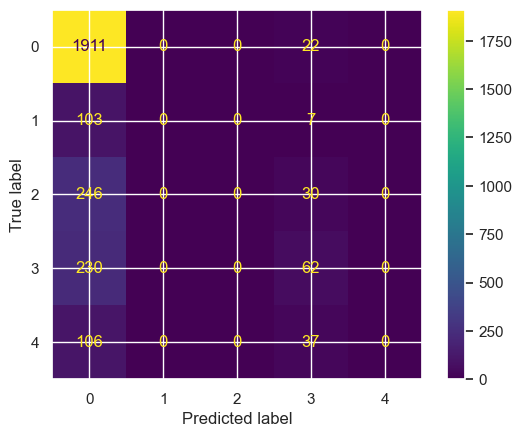

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.show()

### Trainning the model with GridSearchCV

Now its time to train the model with GridSearch

In [17]:
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [18]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True, verbose=3)

In [65]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   9.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   9.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   9.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   9.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   9.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   6.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   6.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   5.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   5.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   5.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.709 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.712 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   2.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.712 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.713 total time=   1.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.715 total time=   1.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.719 total time=   1.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.724 total time=   1.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.723 total time=   1.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.708 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.710 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.715 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.709 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.709 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.708 total time=   9.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.707 total time=   9.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.708 total time=   9.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.708 total time=   9.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=   9.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.711 total time=   5.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.722 total time=   5.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.717 total time=   5.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.722 total time=   5.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.723 total time=   5.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.724 total time=   2.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.731 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.717 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.737 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.730 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.729 total time=   1.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.727 total time=   2.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.723 total time=   1.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.728 total time=   1.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.733 total time=   2.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.715 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.717 total time=   1.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.718 total time=   1.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.720 total time=   1.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.722 total time=   1.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=  10.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=  10.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=  10.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.706 total time=  10.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.703 total time=  10.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.682 total time=   6.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.685 total time=   6.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.692 total time=   5.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.709 total time=   6.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.688 total time=   6.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.740 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.750 total time=   2.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.731 total time=   2.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.738 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.740 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.739 total time=   2.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.744 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.731 total time=   2.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.743 total time=   2.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.746 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.724 total time=   2.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.727 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.717 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.729 total time=   2.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.733 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.703 total time=  10.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.704 total time=  10.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.704 total time=  10.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.706 total time=  10.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.703 total time=  10.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.679 total time=   6.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.677 total time=   6.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.692 total time=   6.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.702 total time=   6.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.679 total time=   6.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.741 total time=   3.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.750 total time=   3.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.742 total time=   3.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.743 total time=   3.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.732 total time=   3.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.805 total time=   2.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.802 total time=   2.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.789 total time=   2.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.808 total time=   2.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.798 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.768 total time=   2.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.765 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.756 total time=   2.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.766 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.770 total time=   2.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.703 total time=  11.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.704 total time=  11.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.704 total time=  11.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.706 total time=  11.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.703 total time=  11.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.676 total time=   6.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.677 total time=   7.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.692 total time=   7.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.702 total time=   6.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.679 total time=   7.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.732 total time=   4.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.740 total time=   4.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.739 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.735 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.728 total time=   4.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.822 total time=   6.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.817 total time=   5.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.811 total time=   5.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.809 total time=   5.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.808 total time=   6.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.825 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.823 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.815 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.816 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.826 total time=   2.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [66]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [67]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001, random_state=2021)

In [68]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1933
           1       0.00      0.00      0.00       110
           2       0.45      0.54      0.49       276
           3       0.46      0.60      0.52       292
           4       0.45      0.26      0.33       143

    accuracy                           0.82      2754
   macro avg       0.46      0.47      0.46      2754
weighted avg       0.79      0.82      0.80      2754



c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


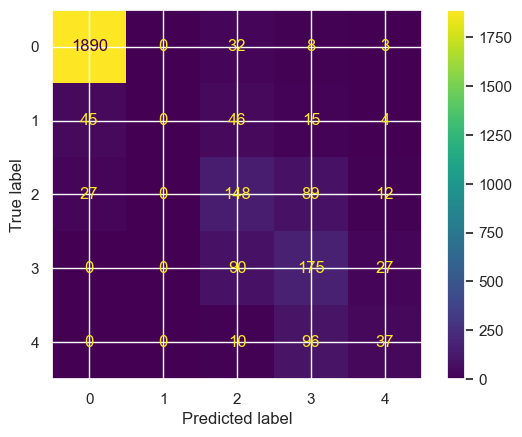

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.show()

In [74]:
print(confusion_matrix(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))

[[1890    0   32    8    3]
 [  45    0   46   15    4]
 [  27    0  148   89   12]
 [   0    0   90  175   27]
 [   0    0   10   96   37]]
0.8169934640522876


In [19]:

X_train_submission = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y_train_submission = data_dt['Injeção na rede (kWh)'].to_frame()
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)

print(X_train_submission.info())
print(X_test_submission.info())

model_submission = GridSearchCV(SVC(random_state=2021),param_grid,refit=True, verbose=3)
model_submission.fit(X_train_submission,y_train_submission)
predictions_submission = model_submission.predict(X_test_submission)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   temp                     11016 non-null  float64
 4   feels_like               11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   humidity                 11016 non-null  int64  
 8   clouds_all               11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 860.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------              

/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  12.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  11.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  10.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  10.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  10.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   7.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   7.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   7.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   7.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   8.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.706 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.710 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.685 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.712 total time=   3.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.715 total time=   2.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.709 total time=   2.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.718 total time=   2.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.688 total time=   2.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.717 total time=   2.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.711 total time=   2.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.709 total time=   2.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.714 total time=   2.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.717 total time=   2.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.706 total time=   2.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=  10.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=  12.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time=  12.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=  11.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=  11.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.707 total time=   7.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.708 total time=   7.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.701 total time=   7.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.677 total time=   6.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.713 total time=   7.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.717 total time=   3.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.702 total time=   3.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.707 total time=   3.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.657 total time=   3.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.728 total time=   3.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.717 total time=   2.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.708 total time=   2.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.714 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.681 total time=   2.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.717 total time=   3.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.715 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.712 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.724 total time=   2.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.701 total time=   2.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.715 total time=   2.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.702 total time=  12.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.705 total time=  12.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.701 total time=  12.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.699 total time=  12.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.703 total time=  12.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.674 total time=   8.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.658 total time=   7.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.634 total time=   7.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.605 total time=   6.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.681 total time=  10.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.731 total time=   3.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.694 total time=   3.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.702 total time=   3.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.639 total time=   3.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.748 total time=   3.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.727 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.728 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.732 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.678 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.732 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.717 total time=   2.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.713 total time=   2.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.728 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.695 total time=   2.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.719 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.701 total time=  12.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.705 total time=  12.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=  13.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.699 total time=  12.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.703 total time=  12.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.668 total time=   8.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.653 total time=   7.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.631 total time=   7.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.599 total time=   6.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.656 total time=  10.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.731 total time=   5.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.691 total time=   5.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.704 total time=   5.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.633 total time=   5.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.749 total time=   5.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.805 total time=   3.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.774 total time=   3.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.794 total time=   3.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.738 total time=   3.6s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.798 total time=   3.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.771 total time=   3.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.765 total time=   3.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.768 total time=   2.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.718 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.763 total time=   3.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.701 total time=  12.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.705 total time=  12.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.700 total time=  12.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.699 total time=  12.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.703 total time=  12.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.669 total time=   8.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.651 total time=   7.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.631 total time=   6.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.599 total time=   6.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.656 total time=  10.1s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.724 total time=   8.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.686 total time=   8.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.702 total time=   8.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.612 total time=   8.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.738 total time=   9.2s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.811 total time=   8.4s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.782 total time=   8.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.791 total time=   8.5s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.754 total time=   8.3s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.812 total time=   9.0s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.820 total time=   3.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.805 total time=   3.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.810 total time=   3.9s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.780 total time=   3.7s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.813 total time=   3.8s


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
row_ids = range(1, len(predictions_submission) + 1)

submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions_submission})
replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
submission_df.replace(replace_map,inplace=True)
submission_df.to_csv('grupo20_svm.csv', index=False)